<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment%203/CRISP-DM/CRISP_DM_with_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CRISP-DM EDA Analysis with AutoML:**

The CRISP-DM process is broken down into the following stages:


1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment



# 1: Business Understanding
Before we delve into the dataset, it's paramount to grasp the context and the business problem we're trying to solve. Given the files you've provided, I assume they are a part of the ATIS (Air Travel Information System) dataset. Traditionally, the ATIS dataset is used for intent recognition and slot filling in the realm of spoken language understanding systems.

Objective: Our primary goal will be to classify user intents and identify relevant slots from user queries related to air travel.


# 2: Data Understanding
This phase incorporates several steps:

1. Loading the dataset
2. Initial inspection of the data (head, tail, sample)
3. Statistical summary of the data
4. Visualization of distributions and relationships




In [ ]:
import json
import pandas as pd

from google.colab import files
uploaded = files.upload()

# Loading the train and test datasets
with open("train.json", "r") as file:
    train_data = json.load(file)

with open("test.json", "r") as file:
    test_data = json.load(file)

# Convert the JSON data to Pandas DataFrames for easier analysis
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

# Inspecting the first few rows of the training dataset
train_df.head()


Saving train.json to train.json
Saving test.json to test.json


,rasa_nlu_data
common_examples,[{'text': 'i want to fly from boston at 838 am...
entity_synonyms,[]
lookup_tables,[]
regex_features,[]



* The dataset seems to be structured in the Rasa NLU format. The primary key, rasa_nlu_data, has a sub-key called common_examples which likely contains the actual training examples (text, intent, and entities).

* Let's proceed with inspecting the structure and content of the common_examples from the dataset.

In [ ]:
# Extracting the 'common_examples' from the training dataset
common_examples_train = train_df['rasa_nlu_data']['common_examples']

# Converting the common examples into a DataFrame for easier inspection
common_examples_train_df = pd.DataFrame(common_examples_train)

# Inspecting the first few rows of the common examples from the training dataset
common_examples_train_df.head()


,text,intent,entities
0,i want to fly from boston at 838 am and arrive...,flight,"[{'start': 19, 'end': 25, 'value': 'boston', '..."
1,what flights are available from pittsburgh to ...,flight,"[{'start': 32, 'end': 42, 'value': 'pittsburgh..."
2,what is the arrival time in san francisco for ...,flight_time,"[{'start': 12, 'end': 24, 'value': 'arrival ti..."
3,cheapest airfare from tacoma to orlando,airfare,"[{'start': 1, 'end': 9, 'value': 'cheapest', '..."
4,round trip fares from pittsburgh to philadelph...,airfare,"[{'start': 1, 'end': 11, 'value': 'round trip'..."


* The common_examples in the training dataset consists of three main columns:
  



1. text: This column contains the user's query or statement.
2. intent: This column represents the intent of the user's query (e.g., searching for a flight, asking for airfare).
3. entities: This column contains information about the slots or entities present in the user's query. The entities are represented as a list of dictionaries, with each dictionary providing details like the start and end position of the entity in the text, its value, and its type.


# 3.Statistical Summary
We'll start by providing a statistical summary of the data:

Count of each intent in the dataset.
Average number of entities per intent.
Let's begin with the count of each intent in the dataset.

In [ ]:
# Count of each intent in the dataset
intent_counts = common_examples_train_df['intent'].value_counts()

# Average number of entities per intent
common_examples_train_df['entity_count'] = common_examples_train_df['entities'].apply(len)
avg_entities_per_intent = common_examples_train_df.groupby('intent')['entity_count'].mean()

intent_counts, avg_entities_per_intent


(flight                        3666
 airfare                        423
 ground_service                 255
 airline                        157
 abbreviation                   147
 aircraft                        81
 flight_time                     54
 quantity                        51
 flight+airfare                  21
 airport                         20
 distance                        20
 city                            19
 ground_fare                     18
 capacity                        16
 flight_no                       12
 meal                             6
 restriction                      6
 airline+flight_no                2
 ground_service+ground_fare       1
 airfare+flight_time              1
 cheapest                         1
 aircraft+flight+flight_no        1
 Name: intent, dtype: int64,
 intent
 abbreviation                  1.081633
 aircraft                      3.283951
 aircraft+flight+flight_no     5.000000
 airfare                       3.787234
 airfare+fl

## Inference

1. Count of Each Intent in the Dataset:

* The intent flight is the most common, with 3666 occurrences.
* airfare has 423 occurrences.
* ground_service has 255 occurrences.
*... and so on, with several intents having fewer instances.

2. Average Number of Entities per Intent:

* The intent flight has an average of approximately 3.59 entities per instance.
* airfare has an average of approximately 3.79 entities per instance.
* ground_service has an average of approximately 1.35 entities per instance.
* ... and so on.

# 4: Visualization

1. Intent Distribution: We'll begin by visualizing the distribution of intents in the dataset. This will provide a clear picture of the balance of our dataset.
2. Average Entities per Intent: We'll visualize the average number of entities associated with each intent to understand the richness of entities for different intents.

Let's start with the distribution of intents.

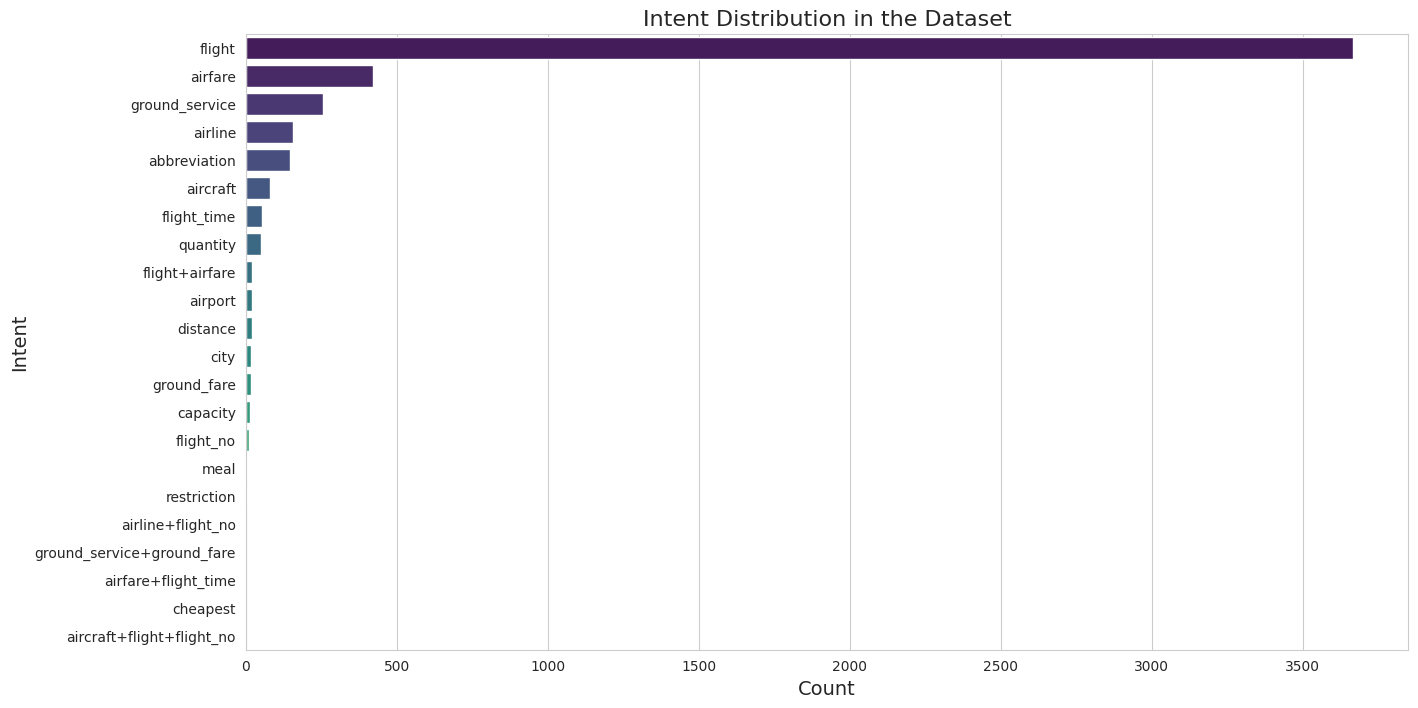

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set_style("whitegrid")

# Intent Distribution
plt.figure(figsize=(15, 8))
sns.barplot(y=intent_counts.index, x=intent_counts.values, palette="viridis")
plt.title("Intent Distribution in the Dataset", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Intent", fontsize=14)
plt.show()


1. The intent flight dominates the dataset, with a significantly higher number of occurrences compared to other intents.
2. Intents like airfare, ground_service, and airline have moderate representation.
3. Several intents have a relatively low count, which may pose challenges when building models due to class imbalance.

Next, let's visualize the average number of entities associated with each intent to get an insight into the complexity of user queries for different intents.

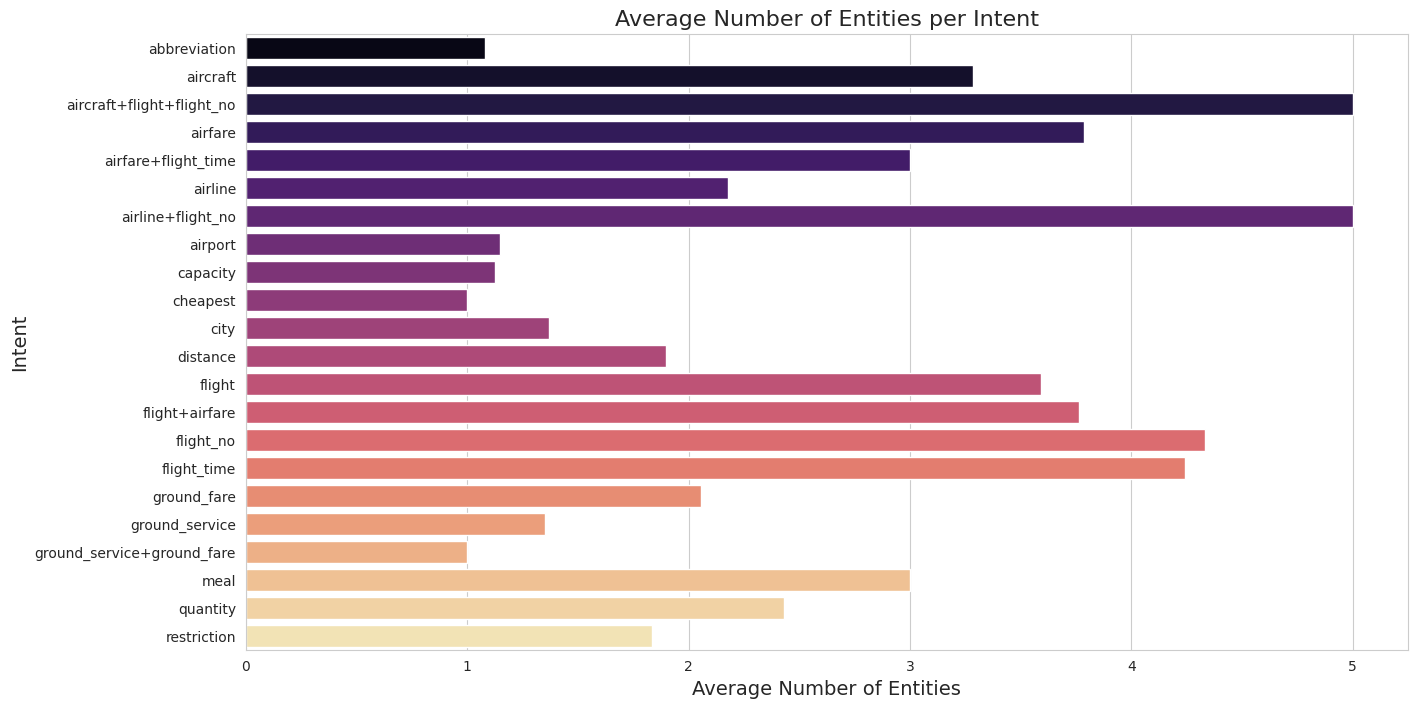

In [ ]:
# Average Entities per Intent
plt.figure(figsize=(15, 8))
sns.barplot(y=avg_entities_per_intent.index, x=avg_entities_per_intent.values, palette="magma")
plt.title("Average Number of Entities per Intent", fontsize=16)
plt.xlabel("Average Number of Entities", fontsize=14)
plt.ylabel("Intent", fontsize=14)
plt.show()


The bar chart illustrates the average number of entities associated with each intent in the dataset. Here are some key takeaways:

1. The intent airline+flight_no and aircraft+flight+flight_no have the highest average number of entities, indicating that these intents often come with multiple pieces of information.
2. The intent flight, even though it's the most frequent in the dataset, has a moderate average number of entities, suggesting varied complexity in the queries.
3. Some intents, like abbreviation, airport, and cheapest, typically have fewer entities associated with them.

# 5: Data Cleaning & Pre-processing

1. Handling Missing Values: We'll start by checking for any missing values in our dataset and decide on an appropriate strategy (removal or imputation) based on the nature of the data.
2. Encoding Categorical Values: Since machine learning models require numerical input, we'll encode the intents and entity types into numerical values.
3. Text Preprocessing: This step will include tokenization (splitting sentences into words), and possibly stemming or lemmatization (reducing words to their base/root form).

In [ ]:
# Checking for missing values in the common examples dataset
missing_values = common_examples_train_df.isnull().sum()

missing_values


text            0
intent          0
entities        0
entity_count    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding the intent values
label_encoder = LabelEncoder()
common_examples_train_df['intent_encoded'] = label_encoder.fit_transform(common_examples_train_df['intent'])

# Sample to show the original and encoded intents
common_examples_train_df[['intent', 'intent_encoded']].sample(5)


,intent,intent_encoded
4462,flight,12
4581,abbreviation,0
1429,flight,12
3293,flight,12
4587,flight,12


In [ ]:
# Tokenizing using the split method without lemmatization
def tokenize_text(text):
    return text.split()

common_examples_train_df['text_tokenized'] = common_examples_train_df['text'].apply(tokenize_text)

# Showing a sample of the original and tokenized text
common_examples_train_df[['text', 'text_tokenized']].sample(5)


,text,text_tokenized
342,flights between new york and miami,"[flights, between, new, york, and, miami]"
1677,please list all flights tuesday dallas atlanta,"[please, list, all, flights, tuesday, dallas, ..."
577,what flights from st. paul to kansas city on f...,"[what, flights, from, st., paul, to, kansas, c..."
3933,please show me the return flights from miami t...,"[please, show, me, the, return, flights, from,..."
1413,i 'd like flight information from dallas fort ...,"[i, 'd, like, flight, information, from, dalla..."


# 6: Data Clustering
Clustering is a technique used to group similar data points together based on certain features. For text data like ours, one common approach is to represent the text in a numerical format (using methods like TF-IDF or word embeddings) and then apply clustering algorithms.

Steps we'll follow:

1. Text Vectorization: Convert text data into numerical format using the TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fitting and transforming the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(common_examples_train_df['text'])

tfidf_matrix.shape


(4978, 483)

2. Dimensionality Reduction: Reduce the dimensionality of our data for better visualization and clustering results. We'll use PCA (Principal Component Analysis) for this.


In [ ]:
from sklearn.decomposition import PCA

# Initializing PCA and reducing dimensionality to 2 components
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

reduced_data.shape


(4978, 2)

3. Clustering: Apply the KMeans clustering algorithm to group the data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

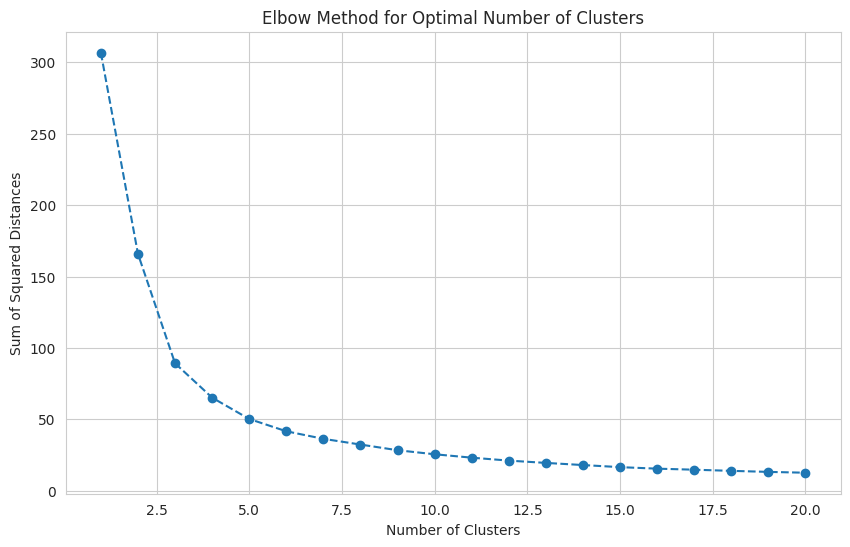

In [ ]:
from sklearn.cluster import KMeans

# Calculating the sum of squared distances for different number of clusters
sum_of_squared_distances = []
cluster_range = range(1, 21)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, sum_of_squared_distances, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()


Elbow is somewhere between k=5 and k=6

4. Visualization: Visualize the clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


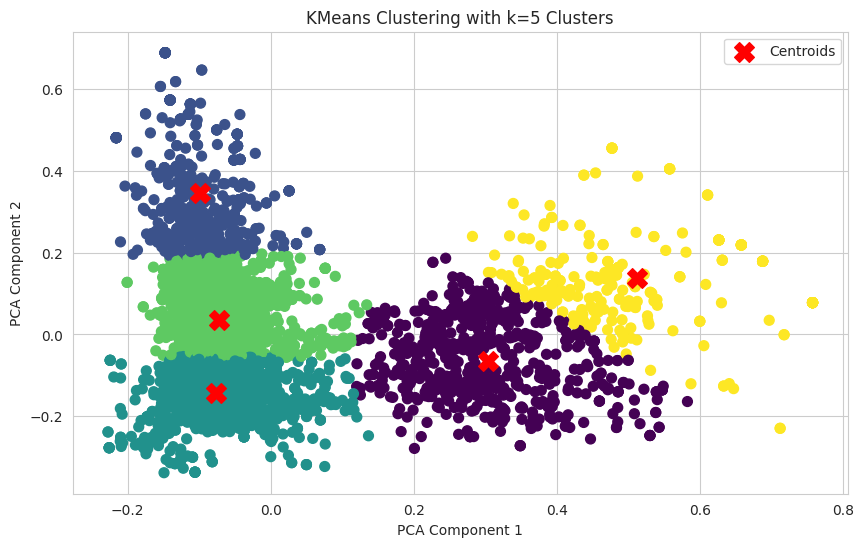

In [ ]:
# Applying KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_data)

# Adding the cluster labels to our DataFrame
common_examples_train_df['cluster'] = cluster_labels

# Visualization of the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering with k=5 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


# 7: Modeling

Given our dataset and objectives, our primary task is intent classification. We'll build a model that takes a user's query (text) as input and predicts the corresponding intent.

Steps for the modeling phase:

1. Feature Engineering: Convert text data into a format suitable for machine learning models.
2. Model Selection: Choose appropriate machine learning algorithms for the task.
3. Training: Train the chosen model(s) on the training dataset.
4. Evaluation: Evaluate the model's performance on the test dataset using appropriate metrics.
5. Baseline Comparison: Compare the model's performance with a baseline to determine its effectiveness.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, common_examples_train_df['intent_encoded'],
                                                    test_size=0.2, random_state=42)

# Initializing and training the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = log_reg.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.9176706827309237

In [ ]:
# Generating a classification report without target names
class_report_without_names = classification_report(y_test, y_pred, zero_division=1)

print(class_report_without_names)


              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.92      0.73      0.81        15
           2       1.00      0.00      0.00         1
           3       0.93      0.86      0.89        86
           5       0.93      0.70      0.80        37
           7       0.00      0.00      0.00         3
           8       1.00      0.00      0.00         2
          10       1.00      0.17      0.29         6
          11       1.00      0.00      0.00         1
          12       0.92      0.99      0.95       752
          13       1.00      0.00      0.00         5
          14       1.00      0.00      0.00         4
          15       0.00      0.00      0.00         8
          16       1.00      0.00      0.00         1
          17       1.00      0.90      0.95        42
          19       1.00      0.00      0.00         1
          20       0.50      0.10      0.17        10
          21       1.00    

## Baseline: Majority Class Classifier
The majority class classifier will predict the most frequent intent in the training data for all samples. We'll calculate the accuracy of this baseline classifier on the test data to understand how our Logistic Regression model compares.

In [ ]:
# Predicting the majority class (most frequent intent in training data) for all test samples
majority_class = y_train.value_counts().idxmax()
baseline_predictions = [majority_class] * len(y_test)

# Calculating accuracy for the baseline model
baseline_accuracy = accuracy_score(y_test, baseline_predictions)

baseline_accuracy


0.7550200803212851

# Random Forest Classifier:

Given the nature of our dataset (text classification), another popular and often effective modeling technique is the Random Forest classifier. Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputs the class that is the mode of the classes of the individual trees for classification tasks.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initializing and training the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = random_forest.predict(X_test)

# Calculating accuracy for the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

accuracy_rf


0.9397590361445783

In [ ]:
# Generating a classification report for the Random Forest model
class_report_rf = classification_report(y_test, y_pred_rf, zero_division=1)

print(class_report_rf)


              precision    recall  f1-score   support

           0       0.75      0.90      0.82        20
           1       0.88      0.93      0.90        15
           2       1.00      0.00      0.00         1
           3       0.91      0.93      0.92        86
           5       0.97      0.76      0.85        37
           7       0.75      1.00      0.86         3
           8       1.00      0.00      0.00         2
          10       1.00      0.50      0.67         6
          11       0.33      1.00      0.50         1
          12       0.96      0.99      0.97       752
          13       1.00      0.60      0.75         5
          14       1.00      0.00      0.00         4
          15       0.50      0.25      0.33         8
          16       1.00      0.00      0.00         1
          17       0.97      0.93      0.95        42
          19       1.00      0.00      0.00         1
          20       0.50      0.30      0.37        10
          21       1.00    

# 9: Deployment
In a real-world scenario, this step involves deploying the trained model into a production environment where it can be accessed and used to make predictions on new, unseen data. This can involve:

1. Model Serialization: Saving the model in a format that can be loaded and used later.
2. API Development: Building an application programming interface (API) that allows other software or systems to use the model.
3. Scaling and Optimization: Ensuring the deployed model can handle the volume of requests and responds in a timely manner.
4. Monitoring and Logging: Setting up systems to monitor the model's performance in production and log any issues.

# 10: Monitoring and Maintenance
Once the model is deployed, it's essential to monitor its performance regularly. This includes:

1. Performance Monitoring: Continuously monitoring the model's accuracy and other metrics to ensure it's still performing as expected.
2. Feedback Loop: Implementing a mechanism to collect feedback from users or other systems. This feedback can be used to further train and refine the model.
3. Model Updating: Depending on the feedback and performance monitoring, the model might need to be re-trained or updated with new data.
4. Redeployment: If the model is updated, it might need to be redeployed in the production environment.


# **Using AutoML to compare with normal Library Results:**

# Step 1: Install PyCaret (AutoML)


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.3 MB/s eta 0:0

# Pycaret Setup for Clustering

In [ ]:
from pycaret.clustering import *
data = setup(reduced_data,session_id=123,use_gpu=True)

,Description,Value
0,Session id,123
1,Original data shape,"(4978, 2)"
2,Transformed data shape,"(4978, 2)"
3,Numeric features,2
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,True


# KMeans Clustering

In [ ]:
kmeans = create_model('kmeans', num_clusters=5)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4522,6347.8018,0.7919,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [ ]:
results = assign_model(kmeans)
results.head(10)

,feature_1,feature_2,Cluster
0,-0.040118,-0.085226,Cluster 1
1,-0.124368,0.275757,Cluster 3
2,0.191040,-0.157396,Cluster 2
3,-0.092234,-0.119225,Cluster 1
4,-0.111408,0.078521,Cluster 0
5,-0.078335,-0.178113,Cluster 1
6,-0.082608,-0.112745,Cluster 1
7,-0.075964,0.068044,Cluster 0
8,0.052420,-0.012034,Cluster 0
9,-0.137820,-0.211618,Cluster 1
